In [2]:
from sklearn.linear_model import LogisticRegression as LR 
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt 

In [3]:
data=load_breast_cancer()
x=data.data
y=data.target
data.data.shape

(569, 30)

In [4]:
## 实例化+训练，solver不需要写
lrl1=LR(penalty="l1",solver="liblinear",C=0.5,max_iter=1000)
lrl2=LR(penalty="l2",solver="liblinear",C=0.5,max_iter=1000)
lrl1=lrl1.fit(x,y)
lrl2=lrl2.fit(x,y)

In [5]:
## 逻辑回归的重要属性coef_,查看每个特征对应的参数
lrl1.coef_

array([[ 4.00940371,  0.03220173, -0.13852815, -0.01622115,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50555463,  0.        , -0.07128686,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24606943, -0.12856361, -0.01440685,  0.        ,
         0.        , -2.03305923,  0.        ,  0.        ,  0.        ]])

In [6]:
lrl2.coef_

array([[ 1.61520498e+00,  1.03165077e-01,  4.89949912e-02,
        -4.54501839e-03, -9.48008442e-02, -3.01421091e-01,
        -4.56859977e-01, -2.23258644e-01, -1.36553775e-01,
        -1.93906452e-02,  1.51863698e-02,  8.84898768e-01,
         1.16165402e-01, -9.44763010e-02, -9.89655843e-03,
        -2.29725881e-02, -5.65958129e-02, -2.71050978e-02,
        -2.78528014e-02,  3.23039398e-04,  1.25588920e+00,
        -3.02228846e-01, -1.72470625e-01, -2.21057469e-02,
        -1.74443731e-01, -8.78235976e-01, -1.16396035e+00,
        -4.29422429e-01, -4.23200446e-01, -8.69294093e-02]])

In [9]:
lrl2.coef_!=0

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True]])

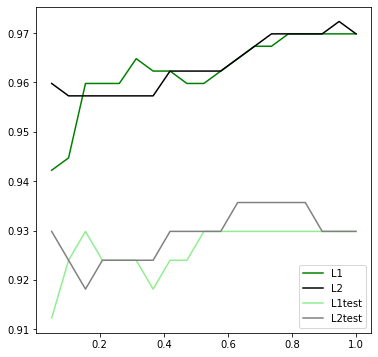

In [19]:
## 哪个正则化效果更好？
l1=[]
l2=[]
l1test=[]
l2test=[]
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=420)
for i in np.linspace(0.05,1,19): ## 0.05到1取19个数
    lrl1=LR(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    lrl2=LR(penalty="l2",solver="liblinear",C=i,max_iter=1000)  
    lrl1=lrl1.fit(train_x,train_y)
    lrl2=lrl2.fit(train_x,train_y)
    
    # 准确率两种方式
#     l1.append(accuracy_score(lrl1.predict(train_x),train_y))
#     l1test.append(accuracy_score(lrl1.predict(test_x),test_y))
#     l2.append(accuracy_score(lrl2.predict(train_x),train_y))
#     l2test.append(accuracy_score(lrl2.predict(test_x),test_y))
    
    l1.append(lrl1.score(train_x,train_y))
    l1test.append(lrl1.score(test_x,test_y))
    l2.append(lrl2.score(train_x,train_y))
    l2test.append(lrl2.score(test_x,test_y))
    
graph=[l1,l2,l1test,l2test]
color=['green','black','lightgreen','gray']
label=["L1","L2","L1test","L2test"]

plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i])
plt.legend(loc=4) ## 图例的位置在哪里？4表示在右下角，具体可以用shift+tab的解释
plt.show()